# K means clustering step by step

In [1]:
import pandas as pd
import numpy as np
import altair as alt

### **Loading Data**

In [2]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\6.3.3_spotify_5000_songs.csv")

In [3]:
df.columns = df.columns.str.strip()


In [4]:
df.select_dtypes(include="number").columns.tolist()


['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [5]:
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


### **Step 1: Select and Prepare Numerical Features**
For k-means clustering, we need to select only the numerical features that are relevant for clustering. Here we are removing the feature "quality". Don't forget to remove duplicates and missing values

In [6]:
# Complete the code
clustering_features = df.select_dtypes(include="number").columns.tolist()

# Create a dataframe with only these features
X = df[clustering_features].copy()
X = X.dropna(axis=0)

### **Step 2: Normalize the Features**
K-means clustering is sensitive to the scale of features. Since our features have different ranges (e.g., duration_ms is in thousands while danceability is 0-1), we need to standardize them so they all contribute equally to the clustering.

In [7]:
#Complete the code

mins = X.min()
maxs = X.max()

# Min-Max normalization
# Formula: (value - min) / (max - min)
X_normalized = (X - mins) / (maxs - mins)* 9 + 1

In [8]:
X_normalized.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,5.742013,6.882082,5.299088,8.433033,6.816046,1.815473,3.620872,3.351299,2.690154,5.053165,5.993190,1.511855,8.025330
std,2.029337,2.595015,2.922185,0.923570,4.303668,0.697972,3.216729,3.386981,1.362399,2.537590,1.201534,0.322677,0.756584
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.875905,5.311000,2.636364,8.139757,1.000000,1.382353,1.022139,1.000009,1.843465,2.790863,5.044890,1.374060,8.200000
50%,6.016546,7.642000,5.090909,8.726484,10.000000,1.547059,1.862048,1.017178,2.139818,4.810152,6.012477,1.456556,8.200000
75%,7.403309,9.037000,7.545455,9.030778,10.000000,1.967157,6.109940,6.875127,3.161094,7.185787,6.636576,1.568497,8.200000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### **Step 3: Initialize K-Means Parameters**
Now we need to set up the initial parameters for k-means clustering. This involves choosing the number of clusters (k) and randomly initializing the cluster centers (centroids).

In [9]:
 #Set the number of clusters
# number of clusters we want
k = 10

# Randomly sample k rows from the dataframe as initial centroids
centroids = X_normalized.sample (k, random_state=42)
centroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3075,6.230610,8.0470,10.000000,9.109566,1.0,1.419608,2.219880,1.000132,3.571429,4.572589,6.554185,1.354542,8.2
1268,7.375388,6.1390,2.636364,8.097796,10.0,1.293137,4.027108,1.000022,2.951368,8.940102,6.120020,1.360219,8.2
422,5.681489,5.0230,7.545455,7.859085,10.0,3.647059,6.981928,1.000113,4.109422,7.222335,5.679546,1.262330,8.2
2543,5.579111,2.8450,8.363636,8.557758,1.0,1.565686,9.882530,9.159391,2.112462,1.995939,6.396677,1.659698,8.2
2842,5.709411,7.5340,5.090909,8.928075,1.0,1.358824,1.027831,1.000736,3.425532,3.430457,6.385280,1.408382,8.2
5157,1.623578,1.4527,1.000000,5.814564,10.0,1.414706,9.683735,8.830457,1.836170,1.320711,4.056147,4.212285,8.2
4460,3.540848,9.7390,7.545455,8.785172,1.0,2.382353,1.007120,5.038579,4.683891,2.315736,5.257283,1.441901,8.2
3869,2.386763,9.8470,5.909091,8.915604,10.0,2.215686,1.000238,9.351269,1.842553,2.754315,7.616234,1.549274,8.2
4383,2.880041,9.9640,6.727273,9.087705,10.0,2.392157,1.000012,9.278173,1.516109,1.922843,5.760844,1.538711,8.2
1859,2.386763,1.7281,1.818182,6.677268,10.0,1.391176,9.882530,8.821320,2.039514,1.365482,8.406631,1.314320,6.4


### **Step 4: Assign Each Point to Nearest Centroid**
Now we calculate the distance from each song to each centroid, and assign each song to its closest centroid.

In [10]:
# Initialize a DataFrame to store distances from each point to each centroid
distances = pd.DataFrame()


# Calculate distance from each point to each centroid
for i in range(k):
    # Get the i-th centroid as a pandas Series
    centroid_i = centroids.iloc[i]

     # Subtract centroid from all rows in X_normalized
    differences = X_normalized.subtract(centroid_i, axis=1)

    # Square each difference
    squared_differences = differences ** 2

    # Sum across all features (columns) for each point (row)
    sum_of_squared_differences = squared_differences.sum(axis=1)

    # Take the square root to get Euclidean distance. Use np.sqrt
    euclidean_distance = np.sqrt(sum_of_squared_differences)

    # Store this distance in the distances DataFrame
    distances[f'centroid_{i}'] = euclidean_distance

# Assign each point to its nearest centroid
# Find which centroid has the minimum distance for each row
cluster_assignmentes = distances.idxmin(axis=1)

# Extract just the cluster number (remove 'centroid_' prefix)
cluster_labels = cluster_assignmentes.str.replace('centroid_', '').astype(int)

# Create a result DataFrame with cluster assignments
X_with_clusters = X_normalized.copy()
X_with_clusters['cluster'] = cluster_labels

# Display first 10 rows
X_with_clusters.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,7.124095,3.3310,10.000000,7.875077,1.0,1.691176,7.271084,1.000536,9.890578,3.795939,5.642198,1.531605,8.2,0
1,7.905895,4.5910,2.636364,7.947703,10.0,1.339216,2.960843,1.000017,1.975684,7.331980,6.258895,1.378523,8.2,1
2,8.920372,7.5700,2.636364,8.182159,10.0,4.401961,5.093373,1.000579,2.130699,9.269036,4.940754,1.284313,8.2,1
3,7.561531,1.4518,4.272727,7.145300,10.0,1.461765,8.942771,1.000370,4.519757,5.787817,5.491883,1.365105,8.2,2
4,7.058945,2.0710,5.909091,6.897053,10.0,1.372549,9.277108,1.003134,1.948328,4.673096,6.086541,1.573160,8.2,2
5,5.337125,2.3140,3.454545,7.235532,10.0,1.636275,9.412651,2.407107,1.975684,4.864975,7.009463,1.515366,8.2,2
6,7.282316,2.8630,10.000000,7.775456,1.0,1.534314,9.701807,4.782741,2.021277,7.249746,4.933731,1.267469,8.2,3
7,5.690796,7.5970,6.727273,8.230283,10.0,4.813725,7.289157,1.000513,7.136778,9.095431,5.061335,1.658996,8.2,2
8,7.459152,5.9140,9.181818,8.122885,10.0,1.392157,4.596386,1.694416,2.395137,6.856853,8.151213,1.407452,8.2,2
9,7.273009,8.7760,1.818182,8.633612,10.0,1.374510,6.792169,4.271066,2.267477,5.897462,5.205594,1.352986,8.2,1


In [11]:
distances

,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,centroid_9
0,9.568137,15.125320,11.879140,11.978896,11.245485,18.653049,12.092673,18.514993,18.362494,17.914754
1,12.732929,2.719733,7.459953,16.302232,11.070205,14.563663,14.355331,12.920285,13.243435,13.909914
2,13.690777,4.173929,7.346309,17.324490,12.710221,16.213205,15.204622,14.147157,14.288715,15.831692
3,14.547569,7.910305,6.196827,13.933556,13.981509,12.121338,16.477739,16.042922,16.146488,11.515241
4,13.847282,8.696550,6.007274,12.915025,13.760579,11.788516,16.058035,15.208954,15.202474,10.948062
...,...,...,...,...,...,...,...,...,...,...
5230,17.197372,13.254124,11.546783,11.291233,16.016987,3.336625,16.070101,12.875108,12.828181,5.106820
5231,15.246054,12.427052,9.531556,11.193666,14.681328,6.665009,14.969275,12.748116,12.474446,7.421268
5232,18.523994,17.057250,13.774195,11.676003,18.684132,8.456620,17.386049,14.395261,14.059937,8.647067
5233,16.616697,12.933338,10.654025,11.889226,15.575111,5.357905,15.878278,13.551979,13.367088,6.578730


### **Step 5: Update Centroids**
Now we recalculate each centroid by taking the mean of all points assigned to that cluster. This moves each centroid to the center of its assigned points.

In [12]:
# Get the feature columns (all columns except 'cluster')
feature_columns = X_with_clusters.columns[:-1]

# Initialize a DataFrame to store the new centroids
new_centroids = pd.DataFrame()

# Calculate the mean of each cluster's points for each feature
for i in range(k):
    # Get all points assigned to cluster i
    cluster_i_points = X_with_clusters.loc[X_with_clusters['cluster'] == i]

    # Calculate the mean of these points across all features
    cluster_i_mean = cluster_i_points[feature_columns].mean()

    # Add this as a new row to new_centroids
    new_centroids = pd.concat([new_centroids, cluster_i_mean.to_frame().T], ignore_index=True)

# Display the new centroids
new_centroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7.143081,7.482783,8.763745,8.840689,1.000000,1.900434,2.782053,1.290257,2.786095,6.375144,6.109448,1.476613,8.128144
1,6.923419,7.414871,3.549630,8.778284,9.981211,1.768671,2.666568,1.264636,2.606287,6.663918,6.098632,1.452866,8.152401
2,6.113123,5.759787,7.602966,8.396496,9.976127,1.719110,5.447703,1.355944,2.908771,5.570874,5.929507,1.469214,8.042440
3,4.370254,2.411725,5.744907,6.809560,1.000000,1.457305,9.199500,7.451790,2.262311,2.864665,5.419642,1.657557,7.784615
4,6.768136,7.419159,3.845219,8.831516,1.000000,1.915623,2.646296,1.296905,2.754195,5.761892,6.084957,1.471896,8.121419
5,3.183855,1.831493,3.715909,6.168527,10.000000,1.441660,9.432229,8.199708,2.200272,1.920749,4.204468,2.032206,7.850000
6,3.826007,9.157000,6.407792,8.640075,1.028571,2.028201,1.096443,7.628408,2.926024,3.195974,6.098813,1.547911,7.948571
7,3.641317,9.106175,3.560053,8.612298,10.000000,1.975476,1.112506,7.348281,2.979209,3.524093,6.694739,1.522741,7.954745
8,3.693112,9.275783,6.890085,8.709805,10.000000,2.171566,1.091589,5.697366,2.648233,2.618005,5.531240,1.541162,8.018640
9,4.214532,2.246373,5.033905,6.784805,10.000000,1.449562,9.579597,8.252242,2.209335,2.589395,6.246626,1.585223,7.351639


### **Step 6: Check for Convergence**
Compare the old centroids with the new centroids to see how much they moved. If the movement is very small, the algorithm has converged.

In [13]:
# Calculate the distance each centroid moved
centroid_movements = pd.DataFrame()

for i in range(k):
    # Get old and new centroid positions
    old_centroid = centroids.iloc[i]
    new_centroid = new_centroids.iloc[i]

    # Calculate Euclidean distance between old and new position
    differences_2 = new_centroid - old_centroid
    squared_differences_2 = differences_2 ** 2
    sum_of_squared_differences_2 = squared_differences_2.sum(axis=0)
    movement = np.sqrt(sum_of_squared_differences_2)

    centroid_movements[f'centroid_{i}'] = [movement]

centroid_movements

,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,centroid_9
0,2.732541,3.253954,3.393861,4.106271,3.420382,3.991376,3.636529,3.82224,4.004227,4.642439


### **7. Wrapping everything in functions**

In [14]:
def getting_centroids(X_normalized, centroids, k):
    
    distances = pd.DataFrame()

    for i in range(k):
        centroid_i = centroids.iloc[i]
        differences = X_normalized.subtract(centroid_i, axis=1)
        squared_differences = differences ** 2
        sum_of_squared_differences = squared_differences.sum(axis=1)
        euclidean_distance = np.sqrt(sum_of_squared_differences)
        distances[f'centroid_{i}'] = euclidean_distance

    cluster_assignmentes = distances.idxmin(axis=1)
    cluster_labels = cluster_assignmentes.str.replace('centroid_', '').astype(int)

    X_with_clusters = X_normalized.copy()
    X_with_clusters['cluster'] = cluster_labels

    return X_with_clusters

In [15]:
def getting_new_centroids(X_with_clusters, k):
    # Get the feature columns (all columns except 'cluster')
    feature_columns = X_with_clusters.columns[:-1]

    # Initialize a DataFrame to store the new centroids
    new_centroids = pd.DataFrame()

    # Calculate the mean of each cluster's points for each feature
    for i in range(k):
        # Get all points assigned to cluster i
        cluster_i_points = X_with_clusters.loc[X_with_clusters['cluster'] == i]

        # Calculate the mean of these points across all features
        cluster_i_mean = cluster_i_points[feature_columns].mean()

        # Add this as a new row to new_centroids
        new_centroids = pd.concat([new_centroids, cluster_i_mean.to_frame().T], ignore_index=True)

    return new_centroids
new_centroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7.143081,7.482783,8.763745,8.840689,1.000000,1.900434,2.782053,1.290257,2.786095,6.375144,6.109448,1.476613,8.128144
1,6.923419,7.414871,3.549630,8.778284,9.981211,1.768671,2.666568,1.264636,2.606287,6.663918,6.098632,1.452866,8.152401
2,6.113123,5.759787,7.602966,8.396496,9.976127,1.719110,5.447703,1.355944,2.908771,5.570874,5.929507,1.469214,8.042440
3,4.370254,2.411725,5.744907,6.809560,1.000000,1.457305,9.199500,7.451790,2.262311,2.864665,5.419642,1.657557,7.784615
4,6.768136,7.419159,3.845219,8.831516,1.000000,1.915623,2.646296,1.296905,2.754195,5.761892,6.084957,1.471896,8.121419
5,3.183855,1.831493,3.715909,6.168527,10.000000,1.441660,9.432229,8.199708,2.200272,1.920749,4.204468,2.032206,7.850000
6,3.826007,9.157000,6.407792,8.640075,1.028571,2.028201,1.096443,7.628408,2.926024,3.195974,6.098813,1.547911,7.948571
7,3.641317,9.106175,3.560053,8.612298,10.000000,1.975476,1.112506,7.348281,2.979209,3.524093,6.694739,1.522741,7.954745
8,3.693112,9.275783,6.890085,8.709805,10.000000,2.171566,1.091589,5.697366,2.648233,2.618005,5.531240,1.541162,8.018640
9,4.214532,2.246373,5.033905,6.784805,10.000000,1.449562,9.579597,8.252242,2.209335,2.589395,6.246626,1.585223,7.351639


In [16]:
def centroids_movement (k, centroids, new_centroids):
    # Calculate the distance each centroid moved
    centroid_movements = pd.DataFrame()

    for i in range(k):
        # Get old and new centroid positions
        old_centroid = centroids.iloc[i]
        new_centroid = new_centroids.iloc[i]

        # Calculate Euclidean distance between old and new position
        differences_2 = new_centroid - old_centroid
        squared_differences_2 = differences_2 ** 2
        sum_of_squared_differences_2 = squared_differences_2.sum()
        movement = np.sqrt(sum_of_squared_differences_2)

        centroid_movements[f'centroid_{i}'] = [movement]

    return centroid_movements
centroid_movements

,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,centroid_9
0,2.732541,3.253954,3.393861,4.106271,3.420382,3.991376,3.636529,3.82224,4.004227,4.642439


### **8. Running PCA**

In [17]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame with PCA results
X_pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)

# Display variance explained
variance_explained = pca.explained_variance_ratio_
print(f"""
**PCA Results:**
- PC1 explains {variance_explained[0]:.2%} of variance
- PC2 explains {variance_explained[1]:.2%} of variance
- Total variance explained: {variance_explained.sum():.2%}
""")


**PCA Results:**
- PC1 explains 27.95% of variance
- PC2 explains 26.17% of variance
- Total variance explained: 54.11%



### **9. Running K means with functions**

In [18]:
# Run k-means and store cluster assignments at each iteration
centroides = centroids.copy()
iterations = 100
threshold = 0.001
converged = False

# Store cluster assignments and centroids for each iteration
iteration_data = []

for i in range(iterations):
    # Assign points to nearest centroids
    X_clustered = getting_centroids(X_normalized, centroides, k)

    # Store the cluster assignments for this iteration
    cluster_assignments = X_clustered['cluster']

    # Transform centroids to PCA space
    centroids_pca = pca.transform(centroides)

    # Store iteration data
    iteration_data.append({
        'iteration': i + 1,
        'clusters': cluster_assignments.values,
        'centroids_pc1': centroids_pca[:, 0],
        'centroids_pc2': centroids_pca[:, 1]
    })

    # Calculate new centroids
    new_centroides = getting_new_centroids(X_clustered, k)

    # Calculate how much centroids moved
    movement_df = centroids_movement(k, centroides, new_centroides)
    max_movement = movement_df.max().max()
    # Check for convergence
    if max_movement < threshold:
        converged = True
        print(f"Converged at iteration {i + 1}")
        break

    # Update centroids for next iteration
    centroides = new_centroides

print(f"Total iterations: {len(iteration_data)}")

Converged at iteration 37
Total iterations: 37


### **10. Visualizing Kmeans with PCA**

In [19]:
import altair as alt
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [20]:
# Get data for selected iteration
selected_iteration = len(iteration_data) - 1
iteration_info = iteration_data[selected_iteration]

# Create DataFrame for plotting
plot_df = X_pca_df.copy()
plot_df['cluster'] = iteration_info['clusters']
plot_df['cluster'] = plot_df['cluster'].astype(str)

# Create DataFrame for centroids
centroids_df = pd.DataFrame({
    'PC1': iteration_info['centroids_pc1'],
    'PC2': iteration_info['centroids_pc2'],
    'cluster': [str(i) for i in range(k)]
})

# Create scatter plot of data points
points = alt.Chart(plot_df).mark_circle(
    size=30,
    opacity=0.6
).encode(
    x=alt.X('PC1:Q', title=f'PC1 ({variance_explained[0]:.1%} variance)'),
    y=alt.Y('PC2:Q', title=f'PC2 ({variance_explained[1]:.1%} variance)'),
    color=alt.Color('cluster:N', title='Cluster',
                    scale=alt.Scale(scheme='category10')),
    tooltip=[
        alt.Tooltip('PC1:Q', format='.2f'),
        alt.Tooltip('PC2:Q', format='.2f'),
        'cluster:N'
    ]
)

# Create scatter plot of centroids
centroids_plot = alt.Chart(centroids_df).mark_point(
    shape='cross',
    size=300,
    filled=True,
    strokeWidth=3
).encode(
    x='PC1:Q',
    y='PC2:Q',
    color=alt.Color('cluster:N',
                    scale=alt.Scale(scheme='category10')),
    tooltip=[
        alt.Tooltip('PC1:Q', format='.2f'),
        alt.Tooltip('PC2:Q', format='.2f'),
        'cluster:N'
    ]
)

# Combine plots
chart = alt.layer(points, centroids_plot).properties(
    title='K-Means Clustering (PCA space)',
    width=600,
    height=500
)

chart


alt.LayerChart(...)

In [21]:
X_with_clusters["cluster"].value_counts()

cluster
1    1437
2     754
4     733
0     501
7     411
8     397
6     315
3     299
9     244
5     144
Name: count, dtype: int64

In [22]:
# Get PCA loadings (how original features contribute to PCs)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create DataFrame with loadings
loadings_df = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2'],
    index=X_normalized.columns
)

# Scale loadings for visualization
scale_factor = 3
loadings_df_scaled = loadings_df * scale_factor

# Add feature names
loadings_df_scaled['feature'] = loadings_df_scaled.index

# Create arrows for loadings
loadings_chart_data = []
for feature in loadings_df_scaled.index:
    loadings_chart_data.append({
        'feature': feature,
        'x': 0,
        'y': 0,
        'x2': loadings_df_scaled.loc[feature, 'PC1'],
        'y2': loadings_df_scaled.loc[feature, 'PC2']
    })

loadings_chart_df = pd.DataFrame(loadings_chart_data)

# Create the biplot with current iteration clusters
base_points = alt.Chart(plot_df).mark_circle(size=20, opacity=0.3).encode(
    x=alt.X('PC1:Q', title=f'PC1 ({variance_explained[0]:.1%} variance)'),
    y=alt.Y('PC2:Q', title=f'PC2 ({variance_explained[1]:.1%} variance)'),
    color=alt.Color('cluster:N', title='Cluster', scale=alt.Scale(scheme='category10'))
)

# Create arrows for loadings
arrows = alt.Chart(loadings_chart_df).mark_rule(strokeWidth=2, color='red').encode(
    x='x:Q',
    y='y:Q',
    x2='x2:Q',
    y2='y2:Q'
)

# Create text labels for loadings
labels = alt.Chart(loadings_chart_df).mark_text(
    align='center',
    baseline='middle',
    dx=0,
    dy=-10,
    fontSize=11,
    fontWeight='bold'
).encode(
    x='x2:Q',
    y='y2:Q',
    text='feature:N'
)

# Combine all layers
biplot = (base_points + arrows + labels).properties(
    title=f'Biplot - K-Means',
    width=700,
    height=600
)

biplot

alt.LayerChart(...)

## K means with Scikit Learn 

In [23]:
from sklearn.cluster import KMeans

# Create a KMeans object with the same parameters
kmeans = KMeans(
    n_clusters=k,  # number of clusters (same k=5 as before)
    random_state=42,  # for reproducibility
    max_iter=100,  # maximum number of iterations
    n_init=10  # number of times to run with different initializations
)

# Fit the model to the normalized data
kmeans.fit(X_normalized)

# Get the cluster assignments for each point
sklearn_clusters = kmeans.labels_

# Get the final centroids
sklearn_centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X_normalized.columns
)

# Add cluster assignments to the data
X_sklearn_clusters = X_normalized.copy()
X_sklearn_clusters['cluster'] = sklearn_clusters

X_sklearn_clusters.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,7.124095,3.3310,10.000000,7.875077,1.0,1.691176,7.271084,1.000536,9.890578,3.795939,5.642198,1.531605,8.2,9
1,7.905895,4.5910,2.636364,7.947703,10.0,1.339216,2.960843,1.000017,1.975684,7.331980,6.258895,1.378523,8.2,2
2,8.920372,7.5700,2.636364,8.182159,10.0,4.401961,5.093373,1.000579,2.130699,9.269036,4.940754,1.284313,8.2,2
3,7.561531,1.4518,4.272727,7.145300,10.0,1.461765,8.942771,1.000370,4.519757,5.787817,5.491883,1.365105,8.2,5
4,7.058945,2.0710,5.909091,6.897053,10.0,1.372549,9.277108,1.003134,1.948328,4.673096,6.086541,1.573160,8.2,5
5,5.337125,2.3140,3.454545,7.235532,10.0,1.636275,9.412651,2.407107,1.975684,4.864975,7.009463,1.515366,8.2,5
6,7.282316,2.8630,10.000000,7.775456,1.0,1.534314,9.701807,4.782741,2.021277,7.249746,4.933731,1.267469,8.2,3
7,5.690796,7.5970,6.727273,8.230283,10.0,4.813725,7.289157,1.000513,7.136778,9.095431,5.061335,1.658996,8.2,6
8,7.459152,5.9140,9.181818,8.122885,10.0,1.392157,4.596386,1.694416,2.395137,6.856853,8.151213,1.407452,8.2,6
9,7.273009,8.7760,1.818182,8.633612,10.0,1.374510,6.792169,4.271066,2.267477,5.897462,5.205594,1.352986,8.2,2


In [24]:
X_clustered['cluster'].value_counts()

cluster
2    744
1    741
0    623
4    603
7    574
8    489
5    459
9    376
6    320
3    306
Name: count, dtype: int64

In [25]:
X_sklearn_clusters['cluster'].value_counts()

cluster
2    744
6    744
9    645
1    584
7    572
0    487
5    460
8    376
4    319
3    304
Name: count, dtype: int64

# Agglomerative Hierarchical Clustering with Scikit-Learn and Scipy

### **Step 1: Getting the Linkage Matrix**

### **Linkage Methods Explained**
- **Ward**: Minimizes within-cluster variance (most commonly used, only works with euclidean)
- **Complete**: Maximum distance between clusters (farthest points)
- **Average**: Average distance between all pairs of points in clusters
- **Single**: Minimum distance between clusters (nearest points)

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create linkage matrix using scipy (needed for dendrogram)
# We need to recalculate because sklearn doesn't store the full linkage matrix
linkage_matrix = linkage(
    X_normalized,
    method='ward',  # Same linkage as sklearn
    metric='euclidean'  # Same metric as sklearn
)

# The linkage matrix has shape (n_samples-1, 4) where each row represents a merge
# Columns: [cluster1, cluster2, distance, number_of_original_observations]
linkage_matrix_df = pd.DataFrame(
    linkage_matrix,
    columns=['cluster_1', 'cluster_2', 'distance', 'n_observations']
)

# Display first 10 merges
linkage_matrix_df.head(10)

,cluster_1,cluster_2,distance,n_observations
0,0.0,174.0,0.0,2.0
1,1198.0,3164.0,0.0,2.0
2,800.0,2587.0,0.0,2.0
3,10.0,2494.0,0.0,2.0
4,866.0,2446.0,0.0,2.0
5,1680.0,2921.0,0.0,2.0
6,760.0,1382.0,0.0,2.0
7,767.0,1563.0,0.0,2.0
8,494.0,1306.0,0.0,2.0
9,1687.0,2646.0,0.0,2.0


### **Step 2: Visualizing Dendogram**

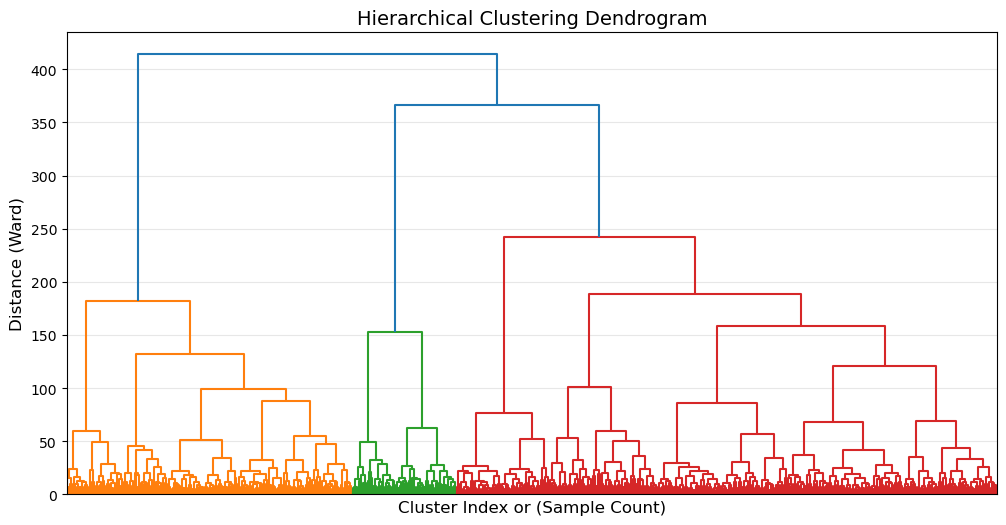

In [27]:
import matplotlib.pyplot as plt

# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram_plot = dendrogram(
    linkage_matrix,
    #truncate_mode='lastp',  # Show only the last p merged clusters
    #p=20,  # Number of clusters to show
    #show_leaf_counts=True,  # Show number of samples in each cluster
    #leaf_font_size=10,
    show_contracted=True,
    no_labels=True# Show height of contracted branches
)

plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Cluster Index or (Sample Count)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.gca();

### **Step 3: Cutting the dendrogram**

In [28]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at height 50
# This assigns cluster labels based on the specified height
clusters_at_height_50 = fcluster(
    linkage_matrix,
    t=90,  # The threshold/height where to cut
    criterion='distance'  # Cut based on distance (height)
)

# Create a dataframe with the cluster assignments
X_clusters_height_50 = X_normalized.copy()
X_clusters_height_50['cluster'] = clusters_at_height_50

# Display first 10 rows
X_clusters_height_50.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,7.124095,3.3310,10.000000,7.875077,1.0,1.691176,7.271084,1.000536,9.890578,3.795939,5.642198,1.531605,8.2,2
1,7.905895,4.5910,2.636364,7.947703,10.0,1.339216,2.960843,1.000017,1.975684,7.331980,6.258895,1.378523,8.2,10
2,8.920372,7.5700,2.636364,8.182159,10.0,4.401961,5.093373,1.000579,2.130699,9.269036,4.940754,1.284313,8.2,9
3,7.561531,1.4518,4.272727,7.145300,10.0,1.461765,8.942771,1.000370,4.519757,5.787817,5.491883,1.365105,8.2,8
4,7.058945,2.0710,5.909091,6.897053,10.0,1.372549,9.277108,1.003134,1.948328,4.673096,6.086541,1.573160,8.2,8
5,5.337125,2.3140,3.454545,7.235532,10.0,1.636275,9.412651,2.407107,1.975684,4.864975,7.009463,1.515366,8.2,8
6,7.282316,2.8630,10.000000,7.775456,1.0,1.534314,9.701807,4.782741,2.021277,7.249746,4.933731,1.267469,8.2,2
7,5.690796,7.5970,6.727273,8.230283,10.0,4.813725,7.289157,1.000513,7.136778,9.095431,5.061335,1.658996,8.2,9
8,7.459152,5.9140,9.181818,8.122885,10.0,1.392157,4.596386,1.694416,2.395137,6.856853,8.151213,1.407452,8.2,11
9,7.273009,8.7760,1.818182,8.633612,10.0,1.374510,6.792169,4.271066,2.267477,5.897462,5.205594,1.352986,8.2,9


### **Step 4: Visualize with PCA**

In [29]:
# Visualize the clusters in PCA space
plot_df_height_50 = X_pca_df.copy()
plot_df_height_50['cluster'] = clusters_at_height_50.astype(str)

chart_height_50 = alt.Chart(plot_df_height_50).mark_circle(size=30, opacity=0.6).encode(
    x=alt.X('PC1:Q', title=f'PC1 ({variance_explained[0]:.1%} variance)'),
    y=alt.Y('PC2:Q', title=f'PC2 ({variance_explained[1]:.1%} variance)'),
    color=alt.Color('cluster:N', title='Cluster', scale=alt.Scale(scheme='category10')),
    tooltip=['PC1', 'PC2', 'cluster']
).properties(
    title='Hierarchical Clustering - Cut at Height 50',
    width=600,
    height=500
)

chart_height_50

alt.Chart(...)